In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# # Read data into a dataframe
df = pd.read_csv("Prostate_Cancer.csv")

# View a sample of the data
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


### Data pre-processing

In [4]:
# Find data type in each column
df.dtypes

id                     int64
diagnosis_result      object
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [5]:
# Convert categorical data into numeric
df = pd.get_dummies(data=df, columns=['diagnosis_result'], drop_first=True)
df.head()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_M
0,1,23,12,151,954,0.143,0.278,0.242,0.079,True
1,2,9,13,133,1326,0.143,0.079,0.181,0.057,False
2,3,21,27,130,1203,0.125,0.160,0.207,0.060,True
3,4,14,16,78,386,0.070,0.284,0.260,0.097,True
4,5,9,19,135,1297,0.141,0.133,0.181,0.059,True


In [6]:
# View correlation between diagnosis_result_M and other columns
corr_matrix = df.corr()
corr_matrix['diagnosis_result_M']

id                   -0.316889
radius               -0.176967
texture               0.070735
perimeter             0.607498
area                  0.562444
smoothness            0.197616
compactness           0.512234
symmetry              0.233028
fractal_dimension     0.008180
diagnosis_result_M    1.000000
Name: diagnosis_result_M, dtype: float64

In [7]:
# Data with correlation absolute values less than 0.1 can be considered insignificant and so they can be dropped
# id column showed a somewhat high correlation value with the diagnosis result, but we know that it's irrelevant, so we drop it
df.drop(['texture', 'fractal_dimension', 'id'], axis=1, inplace=True)
df.head()

,radius,perimeter,area,smoothness,compactness,symmetry,diagnosis_result_M
0,23,151,954,0.143,0.278,0.242,True
1,9,133,1326,0.143,0.079,0.181,False
2,21,130,1203,0.125,0.160,0.207,True
3,14,78,386,0.070,0.284,0.260,True
4,9,135,1297,0.141,0.133,0.181,True


In [8]:
# Check for missing data
df.isnull().sum()

radius                0
perimeter             0
area                  0
smoothness            0
compactness           0
symmetry              0
diagnosis_result_M    0
dtype: int64

In [9]:
df.describe()

,radius,perimeter,area,smoothness,compactness,symmetry
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,96.780000,702.880000,0.102730,0.126700,0.193170
std,4.879094,23.676089,319.710895,0.014642,0.061144,0.030785
min,9.000000,52.000000,202.000000,0.070000,0.038000,0.135000
25%,12.000000,82.500000,476.750000,0.093500,0.080500,0.172000
50%,17.000000,94.000000,644.000000,0.102000,0.118500,0.190000
75%,21.000000,114.250000,917.000000,0.112000,0.157000,0.209000
max,25.000000,172.000000,1878.000000,0.143000,0.345000,0.304000


#### Split data into x,y where x has the features and y has the target

In [10]:
x = df.drop(['diagnosis_result_M'], axis=1)
x.head()

,radius,perimeter,area,smoothness,compactness,symmetry
0,23,151,954,0.143,0.278,0.242
1,9,133,1326,0.143,0.079,0.181
2,21,130,1203,0.125,0.160,0.207
3,14,78,386,0.070,0.284,0.260
4,9,135,1297,0.141,0.133,0.181


In [11]:
y = df['diagnosis_result_M']
y.head()

0     True
1    False
2     True
3     True
4     True
Name: diagnosis_result_M, dtype: bool

#### Box plot to check for outliers in each column

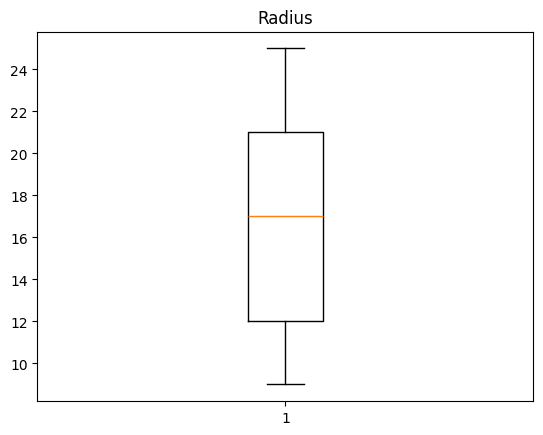

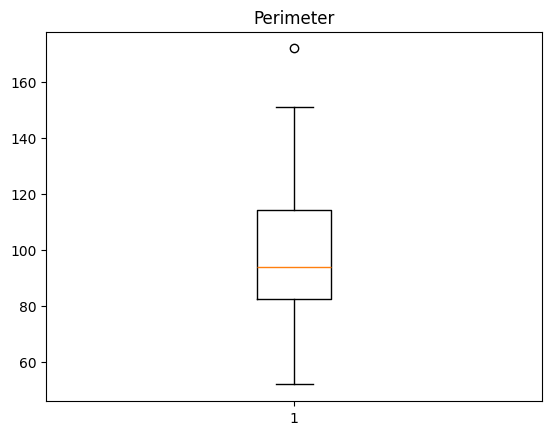

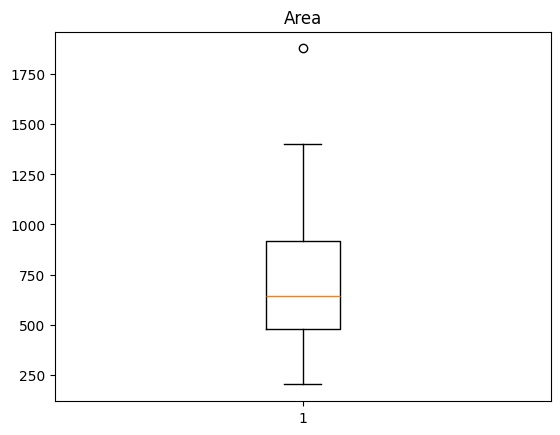

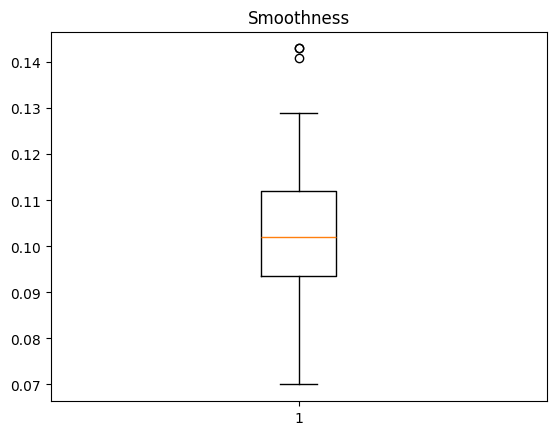

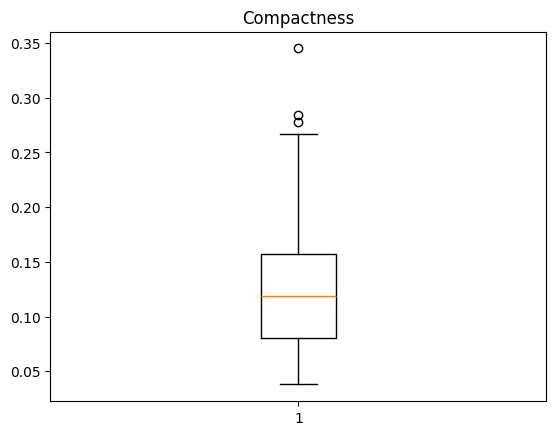

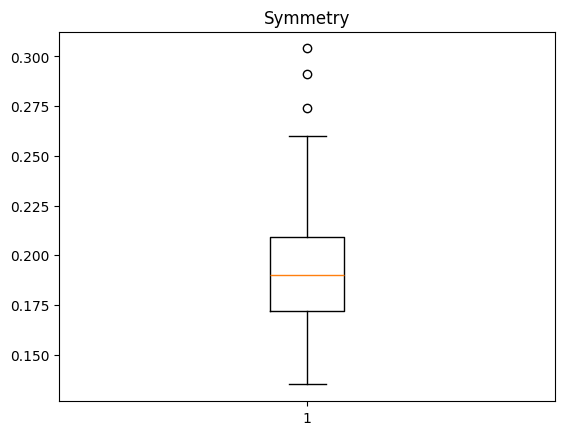

In [12]:
# Plot radius
plt.boxplot(x["radius"])
plt.title("Radius")
plt.show()

# Plot perimeter
plt.boxplot(x["perimeter"])
plt.title("Perimeter")
plt.show()

# Plot area
plt.boxplot(x["area"])
plt.title("Area")
plt.show()

# Plot smoothness
plt.boxplot(x["smoothness"])
plt.title("Smoothness")
plt.show()

# Plot compactness
plt.boxplot(x["compactness"])
plt.title("Compactness")
plt.show()

# Plot symmetry
plt.boxplot(x["symmetry"])
plt.title("Symmetry")
plt.show()

We notice from the plots that the radius column has no outliers, and all the other columns have only larger outliers, which means that lower limits will not be needed in IQR function 

#### Detect outliers using IQR

In [13]:
def detect_upper_limit(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    
    return upper_limit

In [14]:
limit_perimeter = detect_upper_limit(x.perimeter)
limit_perimeter

161.875

In [15]:
limit_area = detect_upper_limit(x.area)
limit_area

1577.375

In [16]:
limit_smoothness = detect_upper_limit(x.smoothness)
limit_smoothness

0.13975

In [17]:
limit_compactness = detect_upper_limit(x.compactness)
limit_compactness

0.27175

In [18]:
limit_symmetry = detect_upper_limit(x.symmetry)
limit_symmetry

0.2645

In [19]:
# A function that replaces outliers with median values
def replace_outliers(data, limit):
    for value in data:
        if (value > limit):
            data = data.replace([value], data.median())
        
    return data

In [20]:
# Apply replace function to all columns with outliers
x.perimeter = replace_outliers(x.perimeter, limit_perimeter)
x.area = replace_outliers(x.area, limit_area)
x.smoothness = replace_outliers(x.smoothness, limit_smoothness)
x.compactness = replace_outliers(x.compactness, limit_compactness)
x.symmetry = replace_outliers(x.symmetry, limit_symmetry)

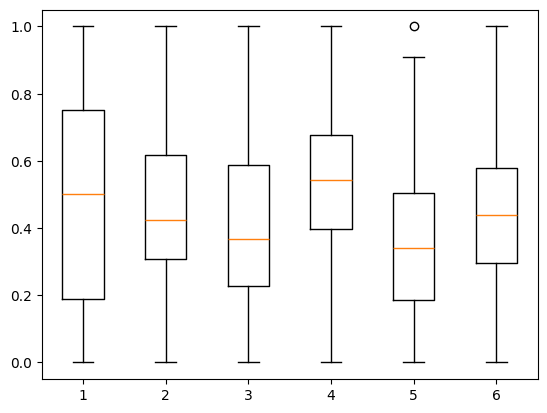

(None,
    radius  perimeter      area  smoothness  compactness  symmetry
 0  0.8750   1.000000  0.625624    0.542373     0.351528     0.856
 1  0.0000   0.818182  0.935108    0.542373     0.179039     0.368
 2  0.7500   0.787879  0.832779    0.932203     0.532751     0.576
 3  0.3125   0.262626  0.153078    0.000000     0.346070     1.000
 4  0.0000   0.838384  0.910982    0.542373     0.414847     0.368)

In [21]:
# Normalize the data
x = (x - x.min()) / (x.max() - x.min())
plt.boxplot(x)
plt.show(), x.head()

In [22]:
# Split the dataset into a training set (80%) and a testing set (20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [23]:
y_test.tolist()

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False]

### KNN using Scikit-learn

In [24]:
# Build the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [25]:
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
       False, False])

In [26]:
# Confusion matrix and model efficiency
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy = (cm[0,0]+ cm[1,1])/ (cm[0,0]+ cm[0,1] + cm[1,0]+ cm[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm[1,1]/(cm[1,1] + cm[0,1])
print("\nSensitivity: " + str(Sensitivity)) 

Specificity = cm[0,0]/(cm[0,0] + cm[1,0])
print("\nSpecificity: " + str(Specificity))

Confusion Matrix:
[[ 4  1]
 [ 1 14]]

Accuracy: 0.9

Sensitivity: 0.9333333333333333

Specificity: 0.8


### KNN using Python from scratch

In [27]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = euclidean_distance(X_test.iloc[i], X_train.iloc[j])
            distances.append((dist, y_train.iloc[j]))
        
        # Sort based on the first element (the distance)
        distances.sort(key=lambda x: x[0])
        
        k_nearest_labels = [label for (value, label) in distances[:k]]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(most_common)
    return y_pred

This implementation calculates the Euclidean distance between each test data point and all training data points, sorts them in ascending order, selects the k nearest neighbors, and predicts the label based on the majority vote. The predicted labels are stored in the predictions list.

In [28]:
y_pred2 = knn_predict(x_train, y_train, x_test, 5)
y_pred2

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False]

In [29]:
# Confusion matrix from scratch
def confusion_scratch(y_test, y_pred):
    
    # Initialize counters
    count_00, count_01, count_10, count_11 = 0, 0, 0, 0
    
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            if y_test[i] == 0:
                count_00 += 1
            else:
                count_11 += 1
        elif y_test[i] == 1:
            count_10 += 1
        else:
            count_01 += 1
    matrix = np.array([[count_00, count_01], [count_10, count_11]])
    return matrix

In [30]:
# Confusion matrix and model efficiency

print("Confusion Matrix:")
cm2 = confusion_scratch(y_test.tolist(), y_pred2)
print(cm2)

Accuracy = (cm2[0,0]+ cm2[1,1])/ (cm2[0,0]+ cm2[0,1] + cm2[1,0]+ cm2[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm2[1,1]/(cm2[1,1] + cm2[0,1])
print("\nSensitivity: " + str(Sensitivity)) 

Specificity = cm2[0,0]/(cm2[0,0] + cm2[1,0])
print("\nSpecificity: " + str(Specificity))

Confusion Matrix:
[[ 4  1]
 [ 1 14]]

Accuracy: 0.9

Sensitivity: 0.9333333333333333

Specificity: 0.8


#### Identical results for both methods

### RNN using Scikit-learn

In [31]:
# Build the model
from sklearn.neighbors import RadiusNeighborsClassifier

# Radius value was chosen based on trial and error
rnn = RadiusNeighborsClassifier(radius=0.7)
rnn.fit(x_train, y_train)
y_pred3 = rnn.predict(x_test)

In [32]:
y_pred3

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
       False, False])

In [33]:
# Confusion matrix and model efficiency

print("Confusion Matrix:")
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

Accuracy = (cm3[0,0]+ cm3[1,1])/ (cm3[0,0]+ cm3[0,1] + cm3[1,0]+ cm3[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm3[1,1]/(cm3[1,1] + cm3[0,1])
print("\nSensitivity: " + str(Sensitivity)) 

Specificity = cm3[0,0]/(cm3[0,0] + cm3[1,0])
print("\nSpecificity: " + str(Specificity))

Confusion Matrix:
[[ 4  1]
 [ 2 13]]

Accuracy: 0.85

Sensitivity: 0.9285714285714286

Specificity: 0.6666666666666666


### RNN using Python from scratch

In [34]:
def rnn_predict(X_train, y_train, X_test, r):
    y_pred = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = euclidean_distance(X_test.iloc[i], X_train.iloc[j])
            if (dist <= r):
                distances.append((dist, y_train.iloc[j]))
        
        r_nearest_labels = [label for (value, label) in distances]
        most_common = max(set(r_nearest_labels), key=r_nearest_labels.count)
        y_pred.append(most_common)
    return y_pred

In [35]:
y_pred4 = rnn_predict(x_train, y_train, x_test, 0.7)
y_pred4

[True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False]

In [36]:
# Confusion matrix and model efficiency

print("Confusion Matrix:")
cm4 = confusion_scratch(y_test.tolist(), y_pred4)
print(cm4)

Accuracy = (cm4[0,0]+ cm4[1,1])/ (cm4[0,0]+ cm4[0,1] + cm4[1,0]+ cm4[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm4[1,1]/(cm4[1,1] + cm4[0,1])
print("\nSensitivity: " + str(Sensitivity)) 

Specificity = cm4[0,0]/(cm4[0,0] + cm4[1,0])
print("\nSpecificity: " + str(Specificity))

Confusion Matrix:
[[ 4  1]
 [ 2 13]]

Accuracy: 0.85

Sensitivity: 0.9285714285714286

Specificity: 0.6666666666666666


In [37]:
# Try different radius value
y_pred4 = rnn_predict(x_train, y_train, x_test, 0.8)
y_pred4

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False]

In [38]:
# Confusion matrix and model efficiency

print("Confusion Matrix:")
cm4 = confusion_scratch(y_test.tolist(), y_pred4)
print(cm4)

Accuracy = (cm4[0,0]+ cm4[1,1])/ (cm4[0,0]+ cm4[0,1] + cm4[1,0]+ cm4[1,1])
print("\nAccuracy: " + str(Accuracy)) # accuracy as a metric

Sensitivity = cm4[1,1]/(cm4[1,1] + cm4[0,1])
print("\nSensitivity: " + str(Sensitivity)) 

Specificity = cm4[0,0]/(cm4[0,0] + cm4[1,0])
print("\nSpecificity: " + str(Specificity))

Confusion Matrix:
[[ 4  1]
 [ 1 14]]

Accuracy: 0.9

Sensitivity: 0.9333333333333333

Specificity: 0.8


#### Model efficiency improved

### Both KNN and RNN showed very similar -if not identical- results. However, KNN model was much easier in choosing the K value than the RNN model in choosing the R value as the K value depends on the size of the dataset which is easier to find than the magnitude and the distribution of the dataset values required for choosing a proper R value.